## 🧩 Step 1: Import Libraries
Before we dive in, let’s bring in all the essential libraries we’ll need — from data handling to model building and visualizing.

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 📥 Step 2: Load the Dataset
We’re using Iris species dataset, which provides information on iris flower species. Let’s take a first look at what the data looks like.

In [2]:
# Load the Iris dataset directly from seaborn
df = sns.load_dataset('iris')

# Preview the dataset
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 🔍 Quick Data Peek

Let’s explore what our dataset looks like and get a feel for the features. We'll look at distributions, correlations, and how different species relate to the measured features.


In [3]:
# Check for missing values
df.isnull().sum()


,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [4]:
# Basic description of the dataset
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


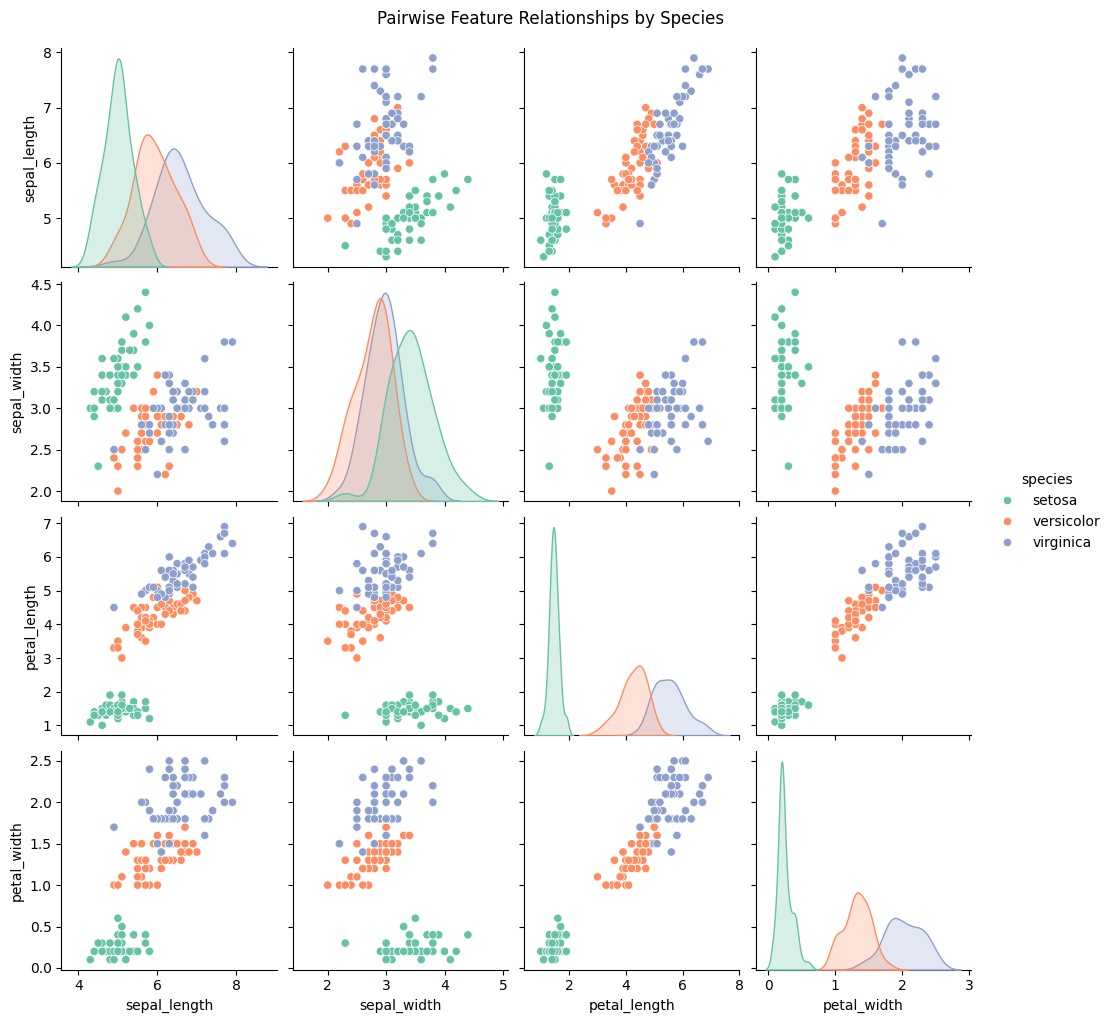

In [5]:
# Pairplot to visualize pairwise relationships between features
sns.pairplot(df, hue="species", palette="Set2")
plt.suptitle("Pairwise Feature Relationships by Species", y=1.02)
plt.show()


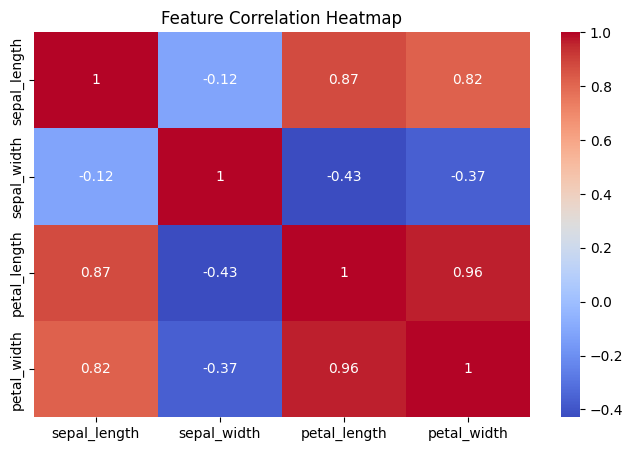

In [7]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


## ✂️ Splitting the Dataset

Now that we understand the data, we’ll split it into features (X) and labels (y), and then use an 80/20 split to create training and testing datasets.


In [8]:
# Define features and target
X = df.drop("species", axis=1)
y = df["species"]

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## 🧠 Training the KNN Classifier

We’ll train a K-Nearest Neighbors model using the training data. KNN works by comparing new data points to its 'k' nearest neighbors in the training set.


In [9]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

## 📊 Model Evaluation

Now let’s evaluate how well our model performs using accuracy, confusion matrix, and classification report.


In [10]:
# Make predictions
y_pred = knn.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# Classification Report
print("📄 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 1.0000
📄 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



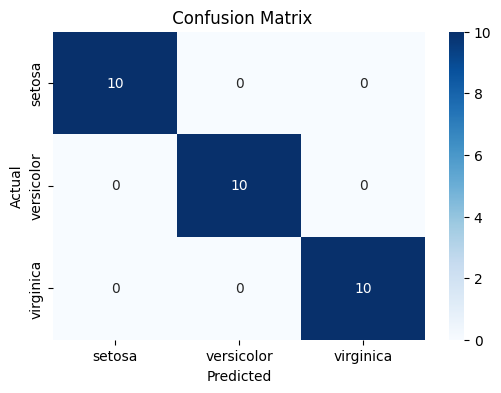

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title(" Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 🌐 Decision Boundary Visualization (2D Projection)

Though our data is 4D, we can project two features to visually understand the decision regions created by KNN. This gives us a rough idea of how it separates species.


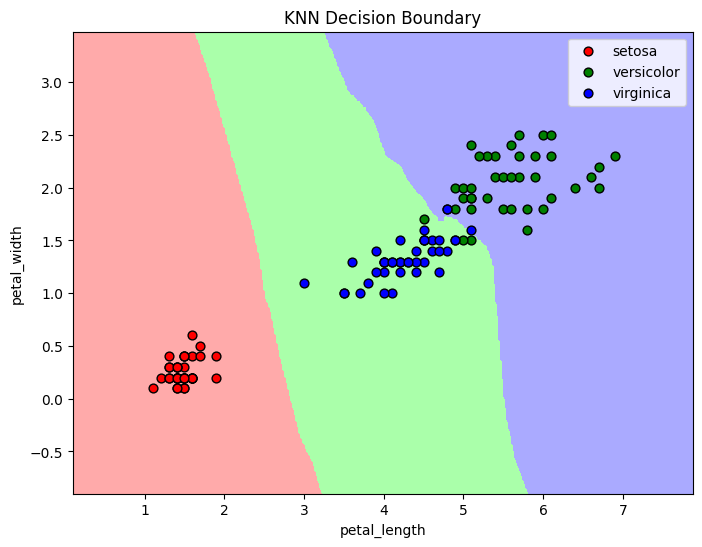

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, features):
    X_proj = X[features].values
    y_labels = pd.factorize(y)[0]

    model.fit(X_proj, y)

    x_min, x_max = X_proj[:, 0].min() - 1, X_proj[:, 0].max() + 1
    y_min, y_max = X_proj[:, 1].min() - 1, X_proj[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = pd.factorize(Z)[0]
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    for i, color in enumerate(cmap_bold):
        idx = np.where(y_labels == i)
        plt.scatter(X_proj[idx, 0], X_proj[idx, 1], c=color, label=df["species"].unique()[i],
                    edgecolor='black', s=40)

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title("KNN Decision Boundary")
    plt.legend()
    plt.show()

plot_decision_boundary(X_train, y_train, KNeighborsClassifier(n_neighbors=5), ["petal_length", "petal_width"])


## 💾 Save the Trained Model
To reuse this model later — in a web app, notebook, or pipeline — we save it using joblib. This way, we don't need to retrain it each time!


In [14]:
import joblib

# Save the trained KNN model
joblib.dump(knn, 'knn_iris_model.pkl')

print("✅ Model saved successfully as 'knn_iris_model.pkl'")


✅ Model saved successfully as 'knn_iris_model.pkl'
